In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from glob import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
# --- Function to get paths and labels ---
def get_image_paths_and_labels(base_dir):
    image_paths = []
    labels = []
    supported_extensions = ['*.jpg', '*.jpeg', '*.png']

    for label in os.listdir(base_dir):
        class_dir = os.path.join(base_dir, label)
        if os.path.isdir(class_dir):
            for ext in supported_extensions:
                for img_path in glob(os.path.join(class_dir, ext)):
                    image_paths.append(img_path)
                    labels.append(label)
    return image_paths, labels

In [ ]:
# --- Drawing Preprocessing ---
def preprocess_drawing_image(image_path):
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        print(f"Error: Could not read image at {image_path}")
        return None

    # 1. Reduce noise
    blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)

    # 2. Global Otsu threshold
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 3. Morphological opening to remove noise
    kernel = np.ones((2, 2), np.uint8)
    opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

    # 4. Resize & stack into 3 channels
    desired_size = (224, 224)
    resized = cv2.resize(opened, desired_size)
    stacked_img = np.stack([resized, resized, resized], axis=-1)

    return stacked_img

In [ ]:
# --- Visualization for before/after ---
def visualize_before_after_drawing(image_path):
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original_img is None:
        print(f"Error: Could not read original image at {image_path}")
        return

    processed_img = preprocess_drawing_image(image_path)
    if processed_img is None:
        return

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(original_img, cmap='gray')
    axes[0].set_title('Original Drawing')
    axes[0].axis('off')

    axes[1].imshow(processed_img[:, :, 0], cmap='gray')
    axes[1].set_title('Processed Drawing')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
# --- Function to process multiple images ---
def load_processed_drawing_images(image_paths):
    processed_images = []
    for path in image_paths:
        processed_img = preprocess_drawing_image(path)
        if processed_img is not None:
            processed_images.append(processed_img)
    return processed_images

In [ ]:
# --- Function to save processed images ---
def save_processed_drawing_images(image_paths, labels, output_dir):
    for label in set(labels):
        os.makedirs(os.path.join(output_dir, label), exist_ok=True)

    for path, label in zip(image_paths, labels):
        processed_img = preprocess_drawing_image(path)
        if processed_img is not None:
            original_filename = os.path.basename(path)
            npy_path = os.path.splitext(os.path.join(output_dir, label, original_filename))[0] + '.npy'
            np.save(npy_path, processed_img)
            print(f"Saved: {npy_path}")

In [ ]:
# --- Paths for Drawing ---
train_dir = '/content/drive/MyDrive/MP_AUTISM/Drawing/Train'
valid_dir = '/content/drive/MyDrive/MP_AUTISM/Drawing/Valid'
test_dir  = '/content/drive/MyDrive/MP_AUTISM/Drawing/Test'

In [ ]:
# Get paths and labels
train_paths, train_labels = get_image_paths_and_labels(train_dir)
valid_paths, valid_labels = get_image_paths_and_labels(valid_dir)
test_paths, test_labels   = get_image_paths_and_labels(test_dir)

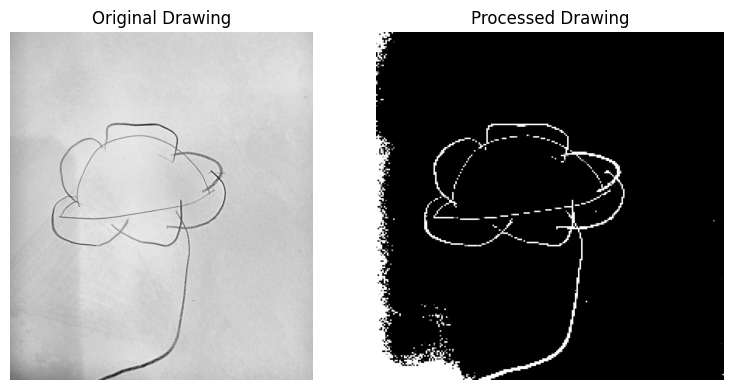

In [ ]:
# Example visualization
if train_paths:
    visualize_before_after_drawing(train_paths[90])

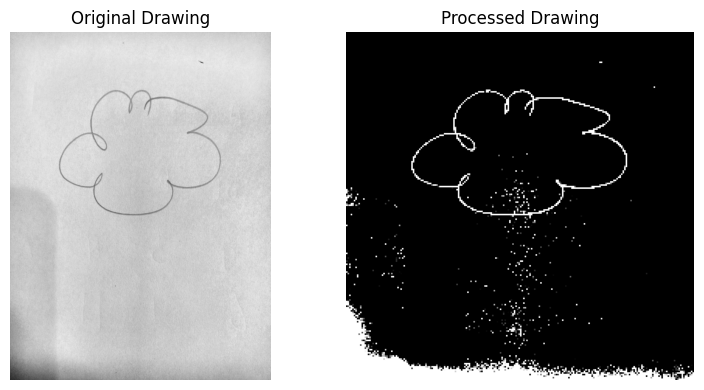

In [ ]:
# Example visualization
if train_paths:
    visualize_before_after_drawing(train_paths[86])

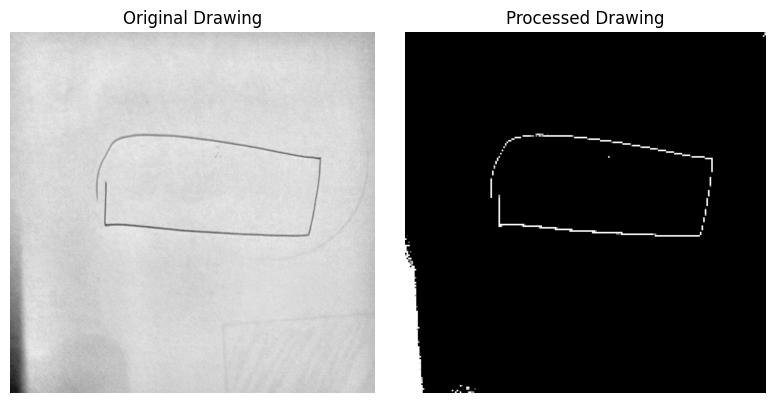

In [ ]:
# Example visualization
if train_paths:
    visualize_before_after_drawing(train_paths[70])

In [ ]:
# --- Save processed datasets ---
output_train = '/content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Train'
output_valid = '/content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Valid'
output_test  = '/content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Test'

In [ ]:
print("Saving training images...")
save_processed_drawing_images(train_paths, train_labels, output_train)
print("\nSaving validation images...")
save_processed_drawing_images(valid_paths, valid_labels, output_valid)
print("\nSaving test images...")
save_processed_drawing_images(test_paths, test_labels, output_test)

Saving training images...
Saved: /content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Train/Non_ASD/mountain 2.npy
Saved: /content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Train/Non_ASD/mountain 3.npy
Saved: /content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Train/Non_ASD/mountain 6.npy
Saved: /content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Train/Non_ASD/people 1.npy
Saved: /content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Train/Non_ASD/flower 6.npy
Saved: /content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Train/Non_ASD/flower 7.npy
Saved: /content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Train/Non_ASD/butterfly 6.npy
Saved: /content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Train/Non_ASD/butterfly 7.npy
Saved: /content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Train/Non_ASD/butterfly 5.npy
Saved: /content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Train/Non_ASD/bird 2.npy
Saved: /content/drive/MyDrive/MP_AUTISM/Drawing/Processed_Train/Non_ASD/house 19.npy
Saved: /content/drive/MyDr